In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
path_columns = "data/BY_COLUMNS_GENERATED-MAG1C"
whole_image = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.1_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191018t141549_r3900_c244_w151_h151"
original = "data/WHOLE_IMAGE_STARCOP-MAG1C"

# Filenames to process
filenames = ["ace.npy", "cem.npy", "label.npy", "mag1c.npy", "mf.npy"]

# Get all subfolders in the column path
subfolders = [f for f in os.listdir(path_columns) if os.path.isdir(os.path.join(path_columns, f))]
#subfolders.sort()  # Ensure sorted order

# Select subfolder based on index_to_plot
index_to_plot = 330
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
subfolder = "ang20191018t174629_r18432_c0_w512_h512"
print(f"Plotting for subfolder: {subfolder}")

# Loop through all specified filenames
for filename in filenames:
    file_column = os.path.join(path_columns, subfolder, filename)
    file_whole = os.path.join(whole_image, subfolder, filename)
    file_original = os.path.join(original, subfolder, filename)

    # Load data if file exists, otherwise set to None
    data_column = np.load(file_column) if os.path.exists(file_column) else None
    data_whole = np.load(file_whole) if os.path.exists(file_whole) else None
    data_original = np.load(file_original) if os.path.exists(file_original) else None

    # Plot based on the file type
    if filename in ["ace.npy", "cem.npy", "mf.npy"]:  # Two images (columns vs whole)
        if data_column is not None and data_whole is not None:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title(f"{filename}")
            axes[1].imshow(data_whole > 0.004, cmap='viridis', interpolation='nearest')
            axes[1].set_title(f"{filename} Thresholded")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "mag1c.npy":  # Three images (columns, whole, original)
        if data_column is not None and data_whole is not None and data_original is not None:
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title("MAG1C ")
            axes[1].imshow(data_whole > 500, cmap='viridis', interpolation='nearest')
            axes[1].set_title("MAG1C (Whole Image)")
            axes[2].imshow(data_original > 500, cmap='viridis', interpolation='nearest')
            axes[2].set_title("MAG1C (Original)")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "label.npy":  # Single image (from any path)
        if data_column is not None:
            plt.figure(figsize=(6, 6))
            plt.imshow(data_column, cmap='viridis', interpolation='nearest')
            plt.title("Label Image")
            plt.axis("off")
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/BY_COLUMNS_GENERATED-MAG1C'

Plotting for subfolder: ang20191018t144405_r2674_c436_w151_h151


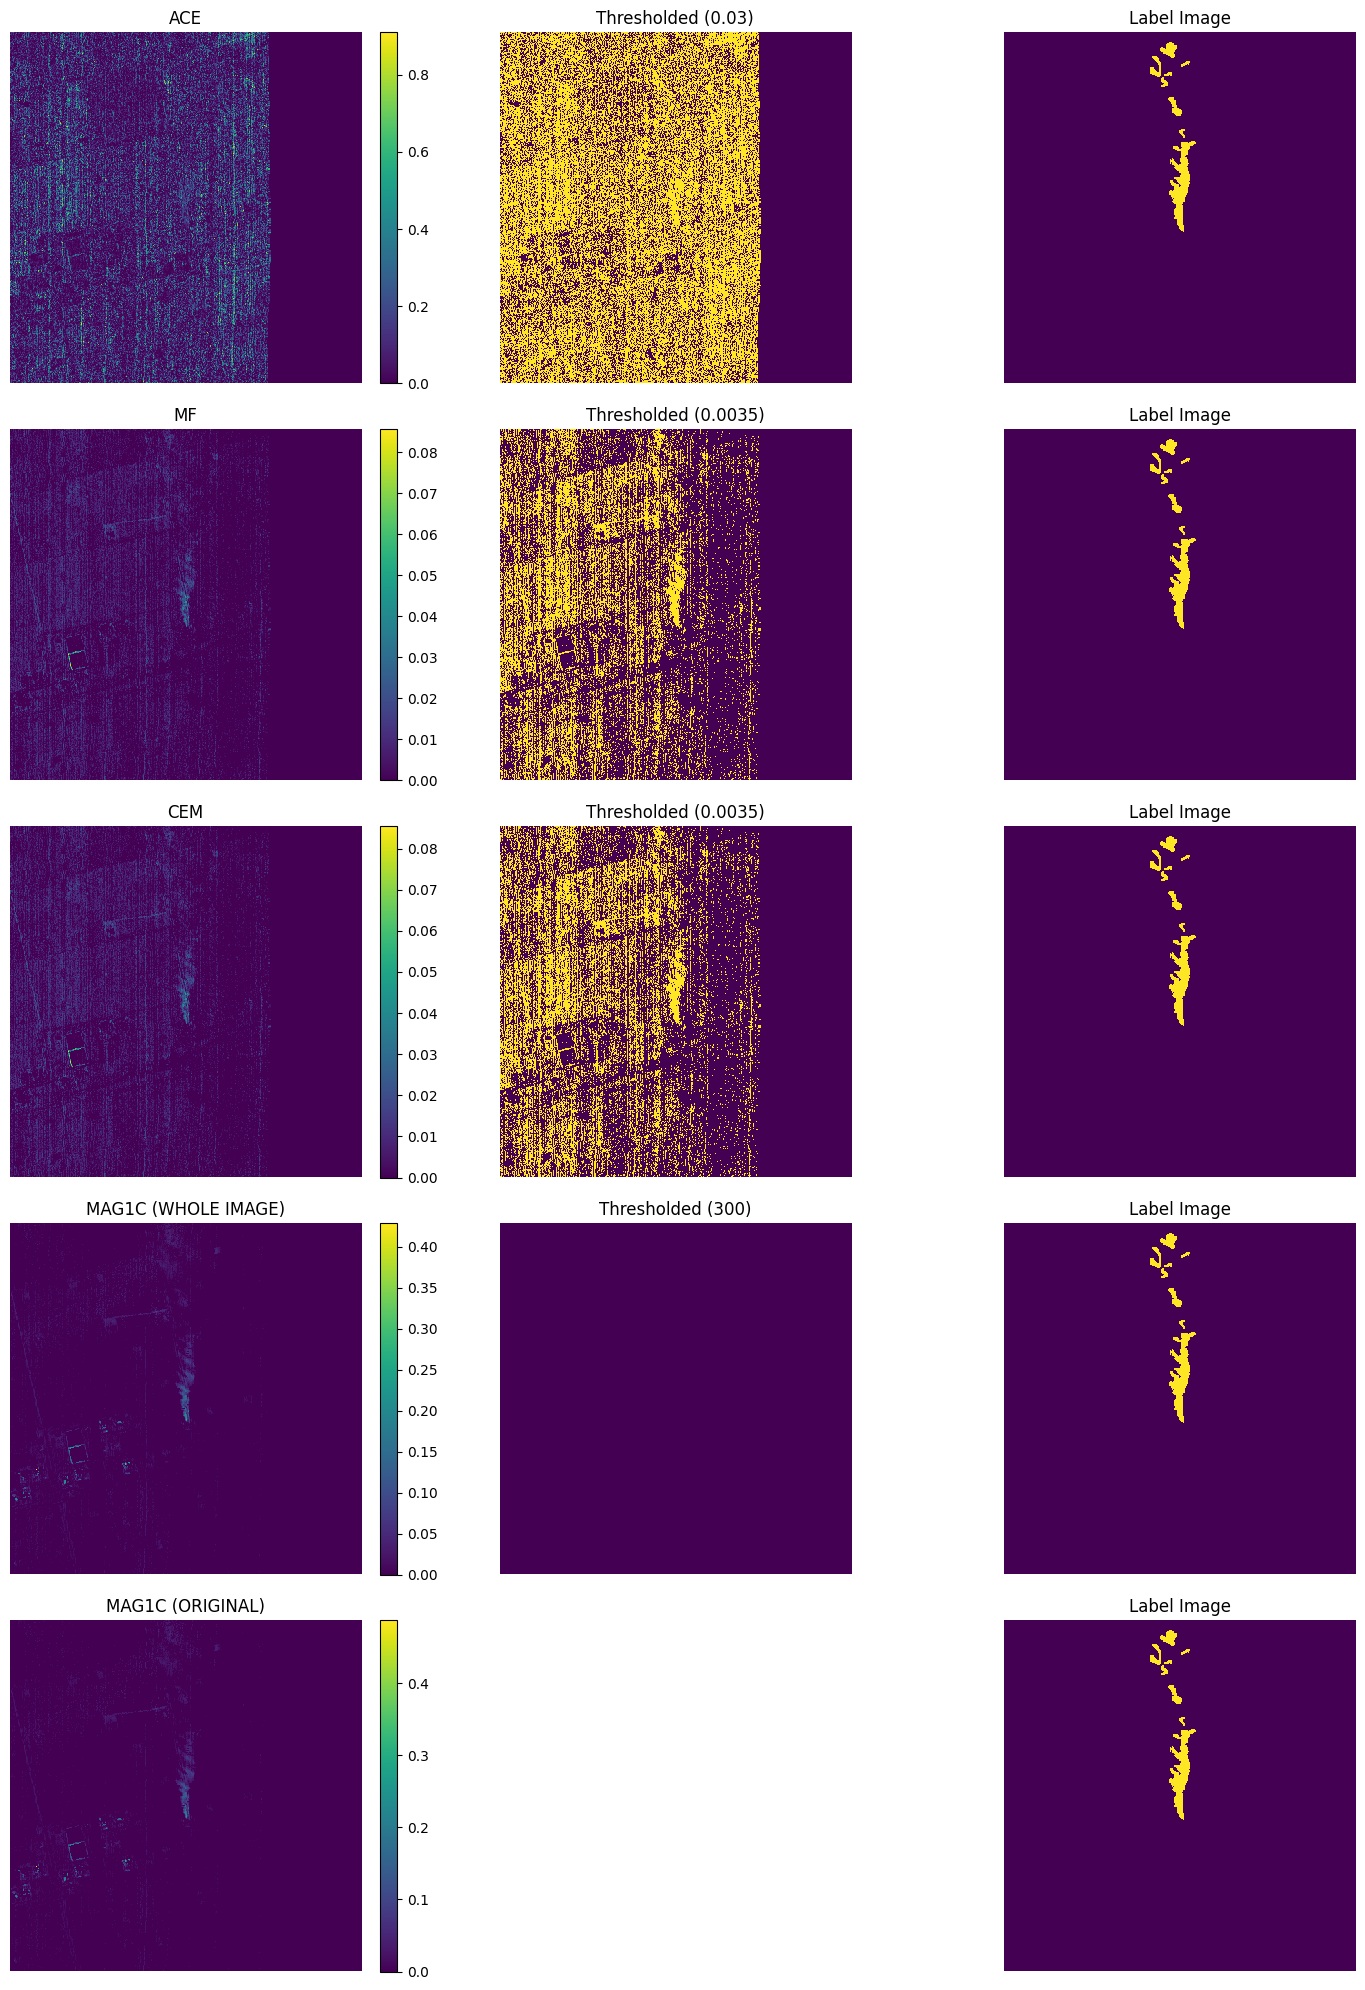

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Paths to folders
evenly_spaced = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-EVENLY-SPACED_CHANNEL-N-10"
highest_transmittance = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-HIGHEST-TRANSMITTANCE_CHANNEL-N-10"
hihgest_variance = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-HIGHEST-VARIANCE_CHANNEL-N-10"
# Filenames to process
filenames = ["ace.tif", "mf.tif", "cem.tif", "mag1c_tile_sampled-0.05.tif", "mag1c_tile.tif"]  # Last one from original

# Thresholds for each product (empirically chosen)
thresholds = {
    "ace.tif": 0.03,
    "mf.tif": 0.0035,
    "cem.tif": 0.0035,
    "mag1c_tile_sampled-0.05.tif": 300,
}

# Get all subfolders in the whole image path
subfolders = [f for f in os.listdir(whole_image) if os.path.isdir(os.path.join(whole_image, f))]

# Select subfolder based on index_to_plot
index_to_plot =3
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
subfolder = "ang20191018t144405_r2674_c436_w151_h151"
print(f"Plotting for subfolder: {subfolder}")

# Create figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Loop through all specified filenames
for row_idx, filename in enumerate(filenames):
    # Determine file paths
    if row_idx == 4:  # Last mag1c.npy from original folder
        file_whole = os.path.join(original, subfolder, filename)
    else:
        file_whole = os.path.join(whole_image, subfolder, filename)
    
    file_label = os.path.join(whole_image, subfolder, "labelbinary.tif")  # Label remains the same

    # Load data
    data_whole = tiff.imread(file_whole) if os.path.exists(file_whole) else None
    data_label = tiff.imread(file_label) if os.path.exists(file_label) else None

    # Plot Whole Image
    if data_whole is not None:
        title = filename.replace(".tif", "").upper()
        if row_idx == 3:
            title = "MAG1C (WHOLE IMAGE)"
            data_whole /= 1e5
        if row_idx == 4:
            title = "MAG1C (ORIGINAL)"
            data_whole /= 1e5
        
        im = axes[row_idx, 0].imshow(np.clip(data_whole,0,None), cmap='viridis', interpolation='nearest')
        axes[row_idx, 0].set_title(title)
        fig.colorbar(im, ax=axes[row_idx, 0], fraction=0.046, pad=0.04)  # Add colorbar

    # Plot Thresholded Image
    if data_whole is not None and filename in thresholds:
        axes[row_idx, 1].imshow(data_whole > thresholds[filename], cmap='viridis', interpolation='nearest')
        axes[row_idx, 1].set_title(f"Thresholded ({thresholds[filename]})")

    # Plot Label Image
    if data_label is not None:
        axes[row_idx, 2].imshow(data_label, cmap='viridis', interpolation='nearest')
        axes[row_idx, 2].set_title("Label Image")

    # Remove axes ticks
    for col in range(3):
        axes[row_idx, col].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


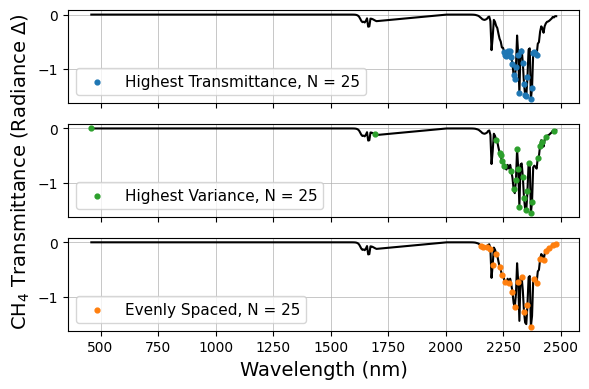

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the spectrum and wavelengths data
transmittance = np.load('resources/starcop_spectrum.npy')  # CH4 transmittance
wavelengths = np.load('resources/starcop_centers.npy')     # Corresponding wavelengths

from utils import select_the_bands_by_transmittance

# Set the number of bands to select
N = 25

# Apply all three strategies and get the selected bands
selected_wavelengths_transmittance = {
    'highest_transmittance': select_the_bands_by_transmittance(wavelengths, transmittance, N, 'highest-transmittance'),
    'highest_variance': select_the_bands_by_transmittance(wavelengths, transmittance, N, 'highest-variance'),
    'evenly_spaced': select_the_bands_by_transmittance(wavelengths, transmittance, N, 'evenly-spaced')
}

# Create a figure with 3 subplots, sharing x and y axes
fig, axes = plt.subplots(3, 1, figsize=(6, 4), sharex=True, sharey=True)

# Plot all strategies
strategies = ['highest_transmittance', 'highest_variance', 'evenly_spaced']  # Use exact dictionary keys
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Medium blue, subdued green, warm orange

for idx, strategy in enumerate(strategies):
    selected_wavelengths, selected_transmittance = selected_wavelengths_transmittance[strategy]  # Use exact keys
    
    ax = axes[idx]  # Current subplot
    ax.plot(wavelengths, transmittance, color='black', linewidth=1.5) # label=r'$\mathrm{CH_4}$ target spectrum (STARCOP)',
    ax.scatter(selected_wavelengths, selected_transmittance, color=colors[idx], label=f'{strategy.replace("_", " ").title()}, N = {N}', zorder=5, s=12)
    
    # Set concise titles without "Bands"
    
    # For the first plot, add y label, for the last, add x label
    if idx == 2:  # Only add x-label for the bottom plot
        ax.set_xlabel('Wavelength (nm)', fontsize=14)
    if idx == 1:  # Only add y-label for the leftmost plot
        ax.set_ylabel(r'$\mathrm{CH_4}$ Transmittance (Radiance $\Delta$)', fontsize=14)

    ax.legend(fontsize=11, loc="lower left")
    ax.grid(True, linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot in a format that fits the IEEE paper
plt.savefig('transmittance_comparison.pdf', bbox_inches='tight')

plt.show()

Plotting for subfolder: ang20191025t205201_r11171_c318_w151_h151


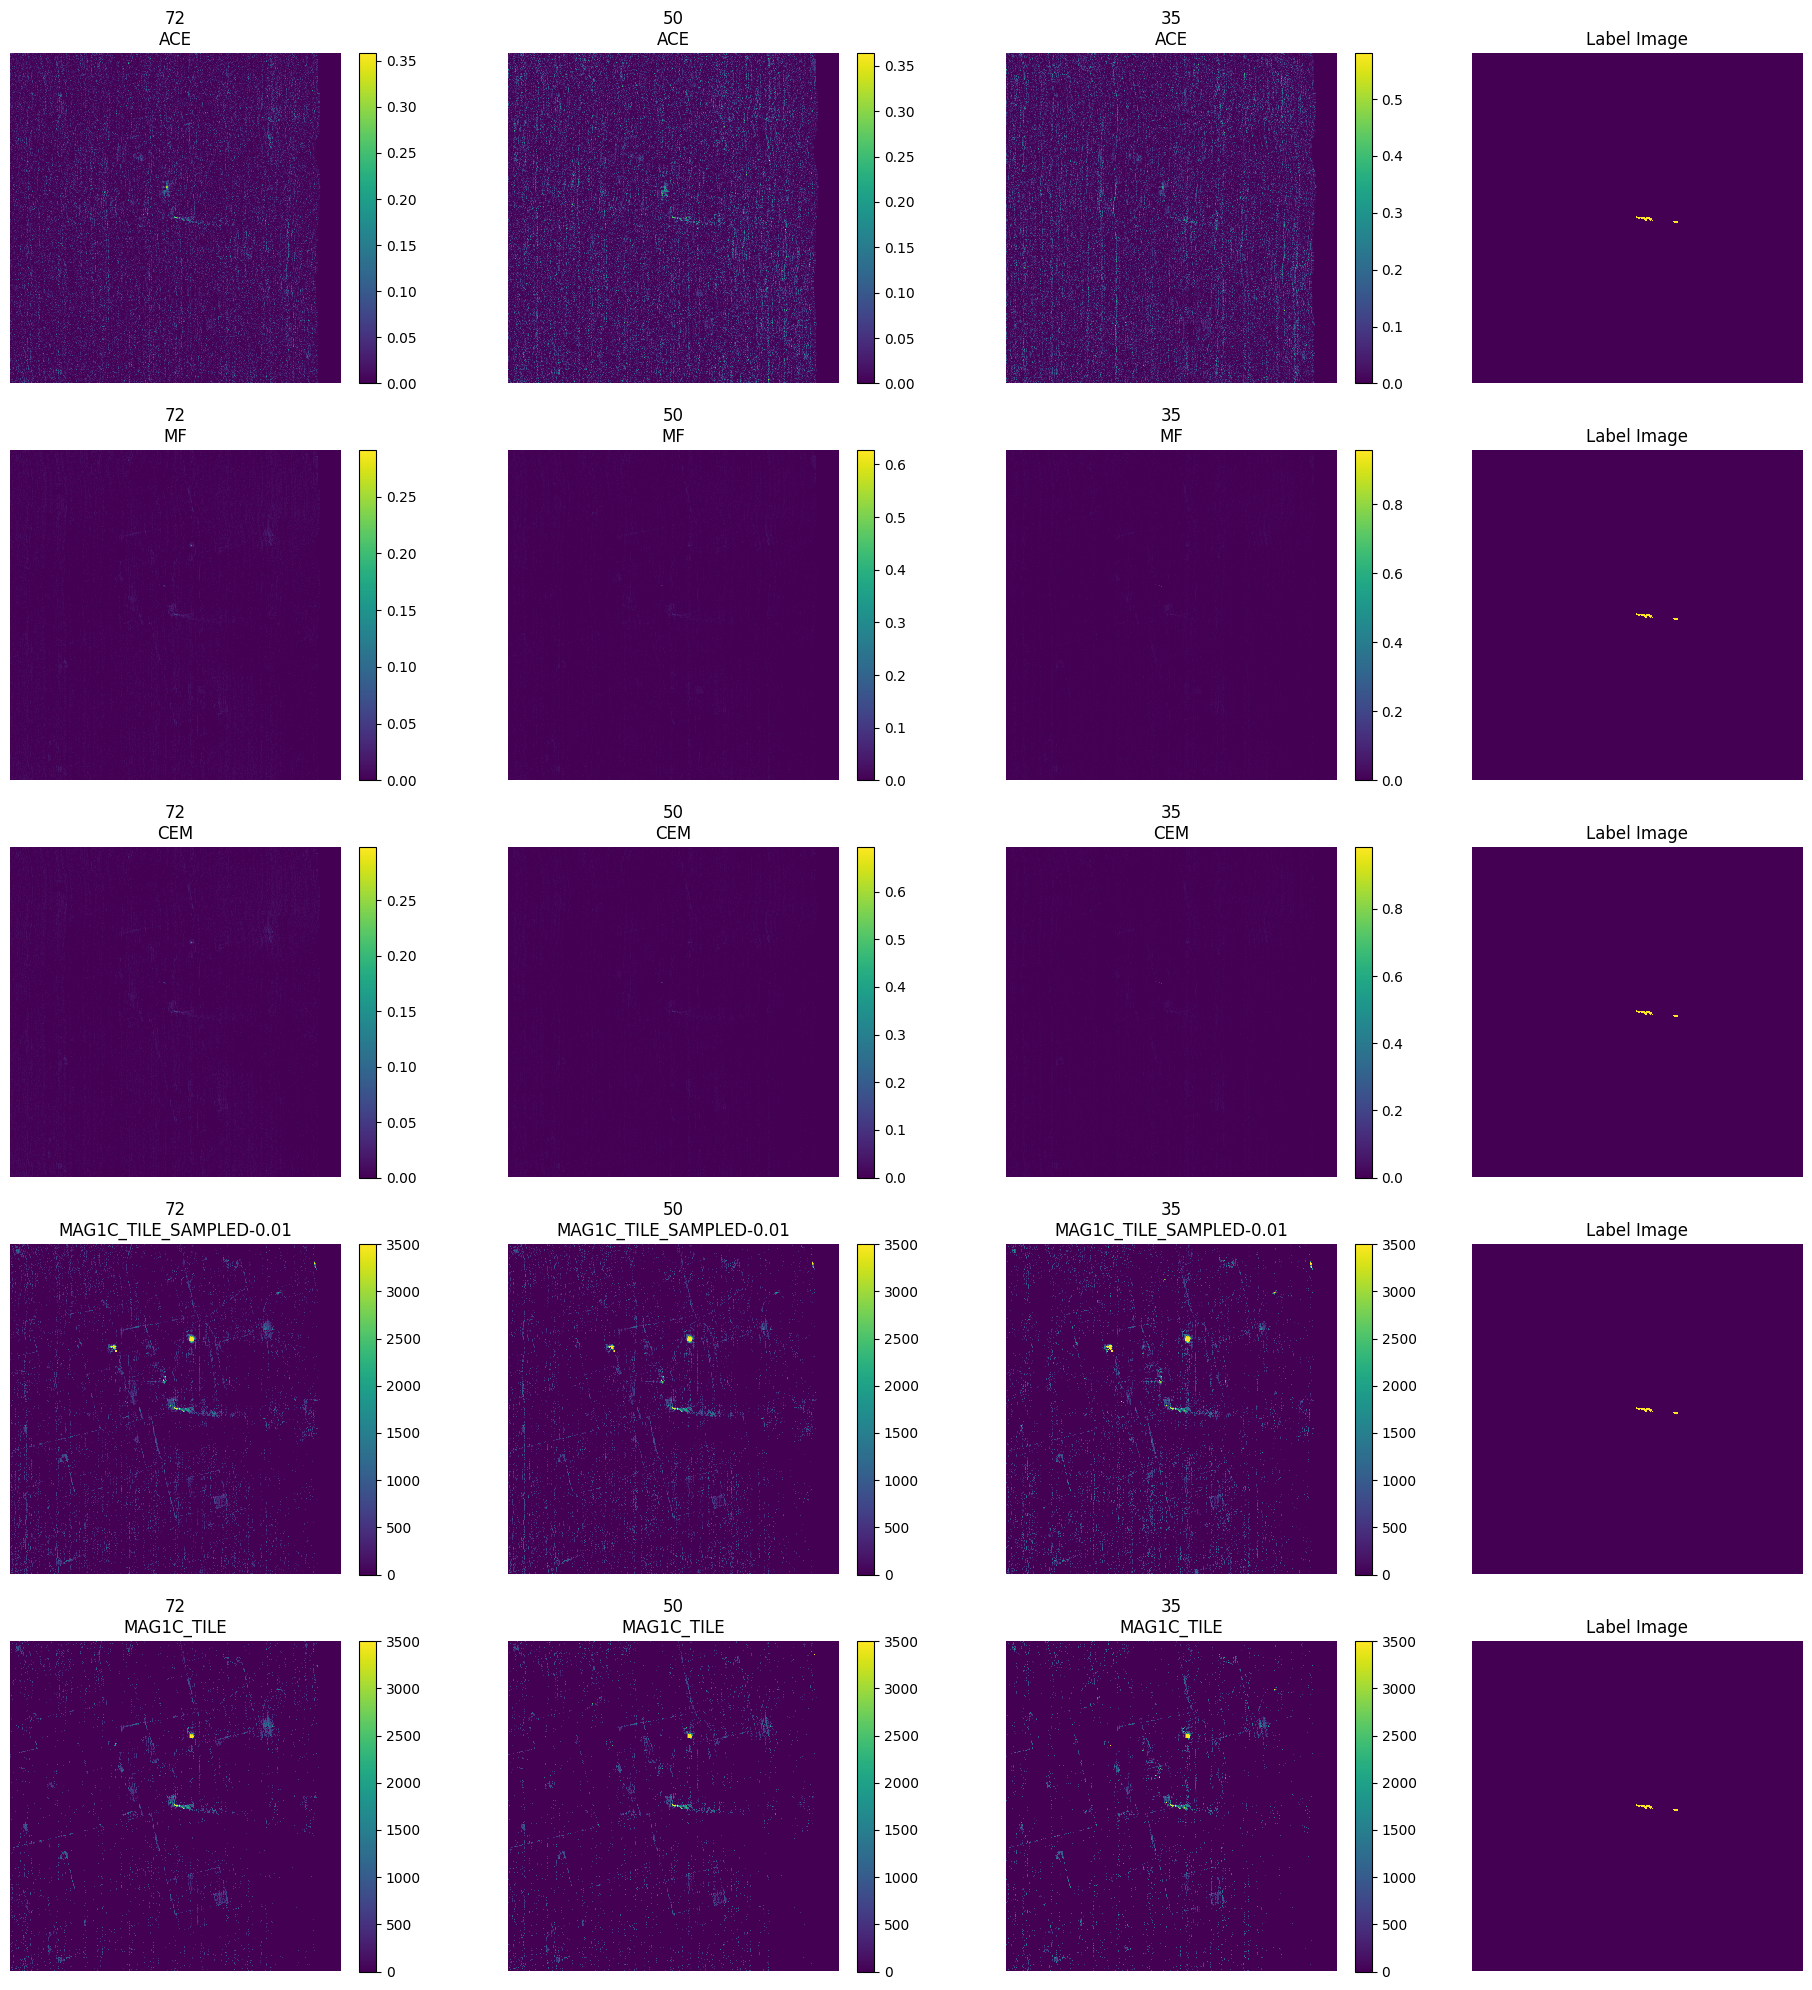

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Paths to datasets
datasets = {
    "72": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72",
    "50": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_200-2600_SELECT-EVENLY-SPACED_CHANNEL-N-50",
    "35": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_200-2600_SELECT-EVENLY-SPACED_CHANNEL-N-35"
}

# Filenames to process
filenames = ["ace.tif", "mf.tif", "cem.tif", "mag1c_tile_sampled-0.01.tif", "mag1c_tile.tif"]

# Subfolder selection
subfolder = "ang20191025t205201_r11171_c318_w151_h151"
print(f"Plotting for subfolder: {subfolder}")

# Create figure with 5 rows and 4 columns
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Loop through all specified filenames
for row_idx, filename in enumerate(filenames):
    for col_idx, (dataset_name, dataset_path) in enumerate(datasets.items()):
        file_path = os.path.join(dataset_path, subfolder, filename)
        data = tiff.imread(file_path) if os.path.exists(file_path) else None
        if "mag1c" in filename:
            data = np.clip(data,0,3500)
        if data is not None:
            
            im = axes[row_idx, col_idx].imshow(np.clip(data, 0, None), cmap='viridis', interpolation='nearest')
            axes[row_idx, col_idx].set_title(f"{dataset_name}\n{filename.replace('.tif', '').upper()}")
            fig.colorbar(im, ax=axes[row_idx, col_idx], fraction=0.046, pad=0.04)
        
        axes[row_idx, col_idx].axis("off")
    
    # Load and plot label image in the last column
    label_path = os.path.join(list(datasets.values())[0], subfolder, "labelbinary.tif")
    label_data = tiff.imread(label_path) if os.path.exists(label_path) else None
    if label_data is not None:
        axes[row_idx, 3].imshow(label_data, cmap='viridis', interpolation='nearest')
        axes[row_idx, 3].set_title("Label Image")
        axes[row_idx, 3].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


In [ ]:
from georeader.readers import emit
import numpy as np
from spectral.io.envi import save_image
import os


def process_emit_scene(path):
    radiance_data_path = path
    radiance_dataset = emit.EMITImage(radiance_data_path)
    radiance_np = radiance_dataset.load_raw()
    #get into [H, W, C] shape
    radiance_np = np.transpose(radiance_np, (1, 2, 0))
    #missing values are written as -9999, we are however counting with zeroes being missing value
    radiance_np = np.clip(radiance_np, 0, None)
    return radiance_np, radiance_dataset.wavelengths, radiance_dataset.fwhm

# --- Configuration ---
INPUT_FILE = "EMIT_L1B_RAD_001_20230428T055536_2311804_004.nc"  # Change this to your actual input file

TILE_SIZE = 512  # Tile dimension
NUM_CHANNELS = 110  # Number of spectral bands to keep
OUTPUT_PREFIX = f"test_tile_{TILE_SIZE}_{TILE_SIZE}_{NUM_CHANNELS}"  # Output name (without extension)

# --- Load the NetCDF file ---
radiance, wavelengths, fwhm = process_emit_scene(INPUT_FILE)

# Get dimensions
height, width, bands = radiance.shape
print(f"Loaded NetCDF: {bands} bands, {height} height, {width} width")

# --- Extract upper-right 512x512 tile ---
start_x = width - TILE_SIZE  # Rightmost 512 pixels
start_y = 0  # Topmost 512 pixels
tile = radiance[start_y:start_y + TILE_SIZE, start_x:start_x + TILE_SIZE, -NUM_CHANNELS:]

# Extract last 125 channels of wavelengths and FWHM
wavelengths = wavelengths[-NUM_CHANNELS:]
fwhm = fwhm[-NUM_CHANNELS:]

# --- Save as ENVI .img and .hdr ---
output_img = OUTPUT_PREFIX + ".img"
output_hdr = OUTPUT_PREFIX + ".hdr"

metadata = {
    "description": "Upper-right 512x512 tile of EMIT scene",
    "bands": NUM_CHANNELS,
    "lines": TILE_SIZE,
    "samples": TILE_SIZE,
    "interleave": "bil",  # Band Interleaved by Line
    "wavelength units": "nm",
    "wavelength": wavelengths.tolist(),
    "fwhm": fwhm.tolist(),
    "data type": 4,  # 32-bit floating point
}

# Save image & metadata
save_image(output_hdr, tile.astype(np.float32), metadata=metadata)

print(f"Saved ENVI files: {output_img}, {output_hdr}")

Loaded NetCDF: 285 bands, 1280 height, 1242 width
Saved ENVI files: test_tile_512_512_125.img, test_tile_512_512_125.hdr


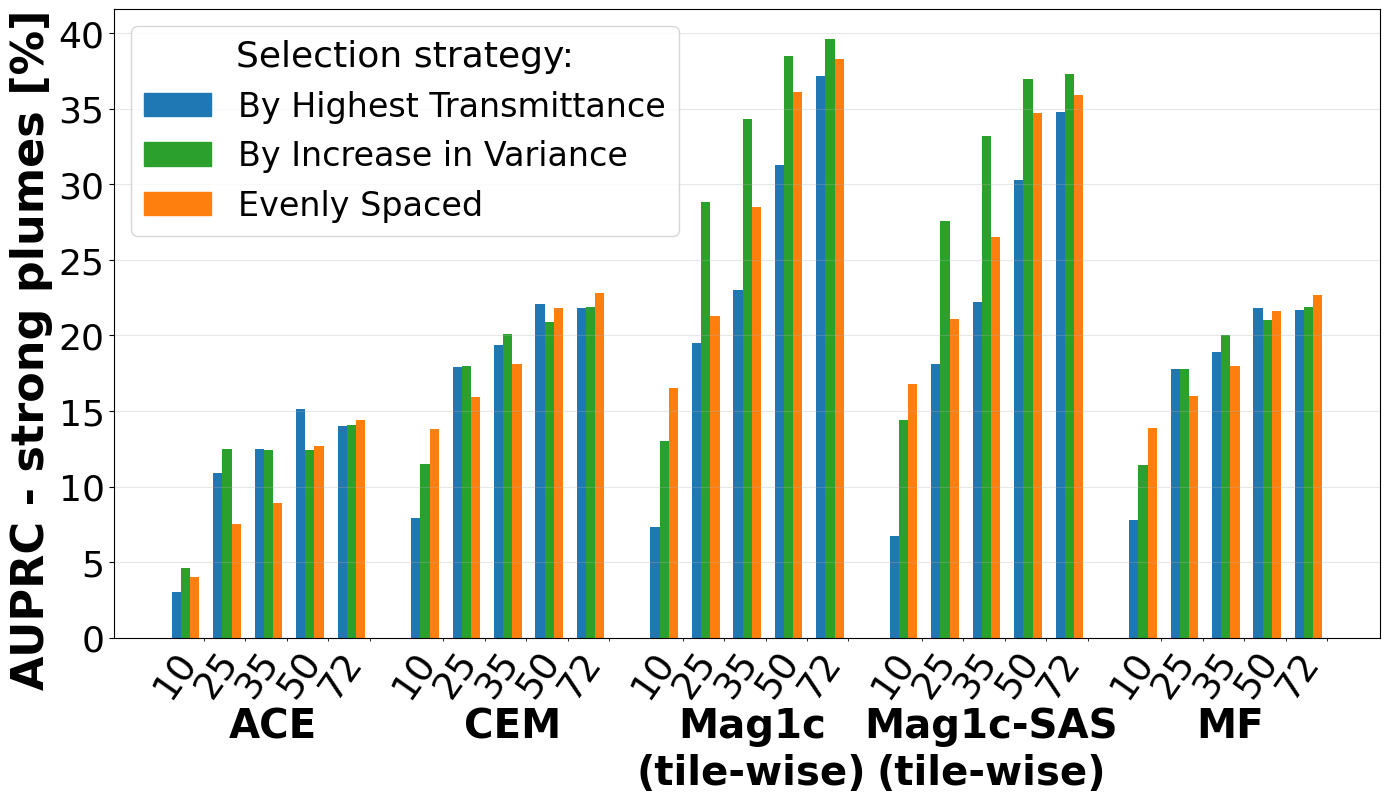

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration
FILE_PATH = 'csvs/selection_strategy.csv'  # Update with your file path
METRIC = "AUPRC_strong"#'F1-score_strong_seg'  # Change this to try different metrics
COLOR_MAP = {'SELECT-HIGHEST-TRANSMITTANCE': '#1f77b4',  # Original blue
             'SELECT-HIGHEST-VARIANCE': '#2ca02c',  # Original green
             'SELECT-EVENLY-SPACED': '#ff7f0e'}  # Original orange

# Read data
df = pd.read_csv(FILE_PATH)

# Get unique values in desired order
methods = df['METHOD'].unique()
channels = [10, 25, 35, 50, 72]  # Modify if different in your data
strategies = ['SELECT-HIGHEST-TRANSMITTANCE', 'SELECT-HIGHEST-VARIANCE', 'SELECT-EVENLY-SPACED']

# Configuration for bar chart layout
bar_width = 0.2  # Adjusted bar width for better fitting
group_spacing = 0.3  # Reduced group spacing
method_spacing = 1  # Adjusted method spacing

# Prepare data for plotting
all_x, all_values, all_colors, method_ticks, method_labels = [], [], [], [], []
channel_centers, channel_labels = [], []  # For minor ticks
current_x = 0

for method in methods:
    method_start = current_x
    for channel in channels:
        channel_start = current_x  # Track start of this channel group
        group_values = []
        for strategy in strategies:  # Use new order
            mask = (df['METHOD'] == method) & \
                   (df['CHANNEL_N'] == channel) & \
                   (df['SELECT_STRATEGY'] == strategy)
            value = df.loc[mask, METRIC].values[0] if any(mask) else 0
            group_values.append(value*100)
        
        x_positions = [current_x + i * bar_width for i in range(len(strategies))]
        current_x += len(strategies) * bar_width + group_spacing
        
        # Store channel group center for minor ticks
        group_width = len(strategies) * bar_width
        channel_center = channel_start + group_width / 2 + 0.3
        channel_centers.append(channel_center)
        channel_labels.append(str(channel))
        
        # Store data
        all_x.extend(x_positions)
        all_values.extend(group_values)
        all_colors.extend([COLOR_MAP[s] for s in strategies])
    
    # Method tick positioning (centered on method's group)
    method_ticks.append(method_start + (current_x - method_start - group_spacing) / 2)
    method_labels.append(method)
    
    # Prepare for next method
    current_x += method_spacing - group_spacing

# Create the plot
plt.figure(figsize=(14, 8))  # Adjusted width for better label spacing
bars = plt.bar(all_x, all_values, width=bar_width, color=all_colors)

# Format x-axis
ax = plt.gca()
ax.set_xticks([])  # Remove main x-ticks
ax.set_xticks(channel_centers, minor=True)
ax.set_xticklabels(channel_labels, minor=True, rotation=55, ha='right', fontsize=27)

for label in ax.get_yticklabels():
    label.set_fontsize(26)
    #label.set_fontweight('bold')

# Add method names below channel numbers
method_label_y = -0.11  # Manual positioning below x-axis
for method_tick, method_label in zip(method_ticks, method_labels):
    if "Mag1c" in method_label:
        method_label = "\n".join(method_label.split(" "))
    ax.text(x=method_tick, y=method_label_y, s=method_label, ha='center', va='top', fontsize=29,
            transform=ax.get_xaxis_transform(), weight="bold")

# Increase bottom margin to accommodate labels
plt.subplots_adjust(bottom=0.25)

# Create legend with updated labels
legend_labels = {
    "SELECT-HIGHEST-TRANSMITTANCE": "By Highest Transmittance",
    "SELECT-HIGHEST-VARIANCE": "By Increase in Variance",
    "SELECT-EVENLY-SPACED": "Evenly Spaced"
}

legend_elements = [plt.Rectangle((0, 0), 1, 1, color=COLOR_MAP[s], label=legend_labels[s]) for s in strategies]
plt.legend(handles=legend_elements, title='Selection strategy:', fontsize=24, title_fontsize=26)

# Add labels and title
label = plt.ylabel("AUPRC - strong plumes [%]", fontsize=32, weight='bold')
label.set_position((0.4, 0.46))
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Save plot
plt.savefig("select_strategy.pdf")

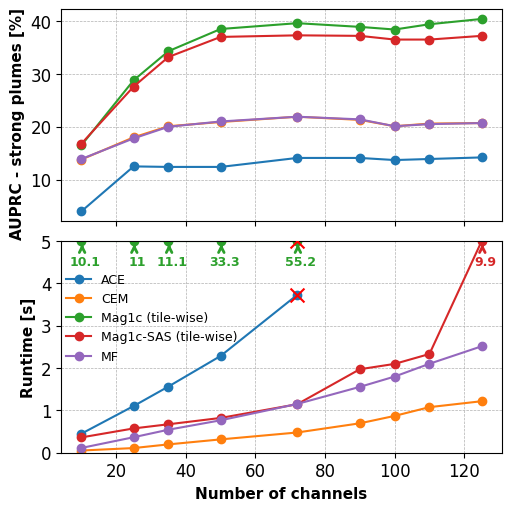

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Define the font properties
font_properties = font_manager.FontProperties(weight='bold')
upper_limit = 5
def plot_line_graphs(csv_path, metric="F1-score_strong_seg"):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Convert 'runtime visualized' column to numeric, treating 'Killed' as NaN
    df["runtime visualized"] = pd.to_numeric(df["runtime visualized"], errors='coerce')
    df[metric] = df[metric] * 100

    # Identify last valid runtime before failure
    failed_methods = df[df["runtime visualized"].isna()]["METHOD"].unique()
    last_valid_runtime = df.groupby("METHOD")["runtime visualized"].apply(lambda x: x.last_valid_index())

    # Define IEEE-style figure size (1 column, 3 rows)
    fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, constrained_layout=True)

    # Set font size for IEEE format
    plt.rc("font", size=10)

    # Get unique methods for colors
    methods = df["METHOD"].unique()
    colors = plt.cm.tab10.colors

    # Plot performance metric (Row 1)
    for i, method in enumerate(methods):
        method_df = df[df["METHOD"] == method]
        axes[0].plot(method_df["CHANNEL_N"], method_df[metric], marker="o", linestyle="-", color=colors[i], label=method)

    label = axes[0].set_ylabel("AUPRC - strong plumes [%]", fontsize=11, weight='bold')
    label.set_position((0.5, 0.46))
    axes[0].grid(True, linestyle="--", linewidth=0.5)

    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontsize(12)
        #label.set_fontweight('bold')

    # Plot runtime metric (Row 2) with arrow and label for clipped points
    for i, method in enumerate(methods):
        method_df = df[df["METHOD"] == method]
        x = method_df["CHANNEL_N"]
        y = method_df["runtime visualized"]

        # Separate values to plot below 8 and those above 8
        y_clipped = y.clip(upper=upper_limit)
        axes[1].plot(x, y_clipped, marker="o", linestyle="-", color=colors[i], label=method)

        # Add upward arrows and numeric labels for points clipped
        for xi, yi in zip(x, y):
            if yi > upper_limit:
                # Arrow
                axes[1].annotate('', xy=(xi+0.2, upper_limit), xytext=(xi+0.2, upper_limit-(upper_limit/20)),
                                 arrowprops=dict(arrowstyle="->", color=colors[i], lw=2),
                                 ha='center')
                plot_text = f"{yi:.1f}"
                if ".0" in f"{yi:.1f}":
                    plot_text = f"{yi:.0f}"
                # Text above arrow
                axes[1].text(xi+1, upper_limit-(upper_limit/7.7), plot_text, ha='center', va='bottom',
                             fontsize=9, fontweight='bold', color=colors[i])

        # Mark last valid runtime before failure
        if method in failed_methods and pd.notna(last_valid_runtime.get(method)):
            idx = last_valid_runtime[method]
            last_point = df.loc[idx]
            axes[1].scatter(last_point["CHANNEL_N"], min(last_point["runtime visualized"], upper_limit),
                            marker='x', color='red', s=100, zorder=5)

    axes[1].set_ylabel("Runtime [s]", fontsize=11, weight='bold')
    axes[1].set_ylim(0,upper_limit)
    axes[1].grid(True, linestyle="--", linewidth=0.5)

    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontsize(12)
        #label.set_fontweight('bold')
    from matplotlib.font_manager import FontProperties

    bold_font = FontProperties(weight='bold')

    axes[1].legend(
    fontsize=9,
    #prop=bold_font,
    loc='upper left',            # anchor point of the legend box
    bbox_to_anchor=(-0.015, 0.903),       # (x, y) offset from the axes corner in axes fraction units
    frameon=False,
    #framealpha=0.6  # 0 = fully transparent, 1 = fully opaque

)
    plt.xlabel("Number of channels", fontsize=11, weight='bold')
    #plt.show()
    plt.savefig("./channel_n.pdf")

plot_line_graphs("csvs/band_n.csv", metric="AUPRC_strong") #AUPRC_strong F1-score_strong_seg

In [ ]:
import os
import numpy as np
import rasterio
import onnxruntime
import matplotlib.pyplot as plt
import torch
from matplotlib.patches import Patch

# --- (ACTION REQUIRED) SET YOUR PATHS HERE ---
# Set the path to the folder containing your .onnx model files
MODELS_BASE_DIR = "." # e.g., "/path/to/my/models" or "downloaded_models"

# Set the path to the folder containing your .npy normalisation files
NORMALISERS_BASE_DIR = "." # e.g., "/path/to/my/files"

# --- User-defined paths and constants ---
tile_name = "ang20191018t181457_r951_c373_w151_h151"
raw_folder = "/mnt/nfs/starcop_big/STARCOP_allbands/"
products_folder = "data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72_backup"

# --- Construct full paths for raw data ---
raw_tile_path = os.path.join(raw_folder, tile_name)
rgb_paths = {
    'r': os.path.join(raw_tile_path, 'TOA_AVIRIS_640nm.tif'),
    'g': os.path.join(raw_tile_path, 'TOA_AVIRIS_550nm.tif'),
    'b': os.path.join(raw_tile_path, 'TOA_AVIRIS_460nm.tif')
}
mag1c_path = os.path.join(raw_tile_path, 'mag1c.tif')

# --- Construct full paths for product data ---
product_tile_path = os.path.join(products_folder, tile_name)
cem_path = os.path.join(product_tile_path, 'cem.tif')
mag1c_sampled_path = os.path.join(product_tile_path, 'mag1c_tile_sampled-0.01.tif')
label_path = os.path.join(product_tile_path, 'labelbinary.tif')

# --- Model and Normalization Paths ---
model_paths = {
    'UNET_CEM': os.path.join(MODELS_BASE_DIR, "UNet_RGB_CEM_R3.onnx"),
    'UNET_MAG1C_SAS': os.path.join(MODELS_BASE_DIR, "UNet_RGB_tileMag1c_1perc_R1.onnx"),
    'Linknet_MAG1C_SAS': os.path.join(MODELS_BASE_DIR, "LinkNet_RGB_tileMag1c_1perc_R3.onnx")
}
norm_paths = {
    'CEM': os.path.join(NORMALISERS_BASE_DIR, "normalisevalues/normaliser_fastprods_rgb_cem.npy"),
    'MAG1C_SAS': os.path.join(NORMALISERS_BASE_DIR, "normalisevalues/normaliser_fastprods_rgb_mag1c_1perc.npy")
}

# --- Helper function to load TIFF images ---
def load_tif(path):
    with rasterio.open(path) as src:
        return src.read(1)

# --- Normalization function ---
def normalize_x(x, params_inputs):
    if not isinstance(x, torch.Tensor):
        x = torch.from_numpy(x)
    offsets, factors, clip_min, clip_max = [torch.from_numpy(p) for p in params_inputs]
    offsets, factors, clip_min, clip_max = [p.view(1, -1, 1, 1) for p in [offsets, factors, clip_min, clip_max]]
    return torch.clamp((x - offsets) / factors, clip_min, clip_max).float()

# --- Load data ---
print("Loading images...")
r_band, g_band, b_band = load_tif(rgb_paths['r']), load_tif(rgb_paths['g']), load_tif(rgb_paths['b'])
rgb_image = np.stack([r_band, g_band, b_band], axis=0)
mag1c_image = load_tif(mag1c_path)
cem_image = load_tif(cem_path)
mag1c_sampled_image = load_tif(mag1c_sampled_path)
label_image = load_tif(label_path).astype(bool)
print(f"All images loaded with shape: {rgb_image.shape[1:]}")

# --- Prepare for plotting ---
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
plt.suptitle(f"Model Comparison for tile: {tile_name}", fontsize=20)

# --- Row configurations ---
configurations = [
    {"name": "UNet + CEM", "model_key": "UNET_CEM", "product_image": cem_image, "product_name": "CEM", "norm_key": "CEM"},
    {"name": "UNet + Mag1c (1%)", "model_key": "UNET_MAG1C_SAS", "product_image": mag1c_sampled_image, "product_name": "Mag1c (1%)", "norm_key": "MAG1C_SAS"},
    {"name": "LinkNet + Mag1c (1%)", "model_key": "Linknet_MAG1C_SAS", "product_image": mag1c_sampled_image, "product_name": "Mag1c (1%)", "norm_key": "MAG1C_SAS"}
]

# --- Main processing loop ---
for i, config in enumerate(configurations):
    print(f"Processing: {config['name']}...")
    try:
        # --- Prepare input, normalize, and run inference ---
        product_channel = np.expand_dims(config["product_image"], axis=0)
        model_input_np = np.expand_dims(np.concatenate([rgb_image, product_channel], axis=0), axis=0)
        norm_params = np.load(norm_paths[config["norm_key"]])
        normalized_input = normalize_x(model_input_np, norm_params)
        
        ort_session = onnxruntime.InferenceSession(model_paths[config["model_key"]])
        input_name = ort_session.get_inputs()[0].name
        output_name = ort_session.get_outputs()[0].name
        inference_output = ort_session.run([output_name], {input_name: normalized_input.numpy()})[0]
        
        # --- Process output ---
        # 1. Get sigmoid probabilities (for column 4)
        inference_probs = (1 / (1 + np.exp(-inference_output))).squeeze()
        
        # 2. Get thresholded prediction (for comparison)
        predicted_label = inference_probs > 0.5
        
        # 3. Create color-coded difference image (for column 5)
        # Define colors
        TP_COLOR = [0, 1, 0]  # Green
        FP_COLOR = [1, 0, 0]  # Red
        FN_COLOR = [0, 0, 1]  # Blue
        
        # Create an empty black image
        h, w = label_image.shape
        difference_rgb = np.zeros((h, w, 3), dtype=np.float32)
        
        # Apply colors based on conditions
        difference_rgb[(label_image == 1) & (predicted_label == 1)] = TP_COLOR
        difference_rgb[(label_image == 0) & (predicted_label == 1)] = FP_COLOR
        difference_rgb[(label_image == 1) & (predicted_label == 0)] = FN_COLOR
        
        # --- Plotting ---
        # Column 1: RGB
        rgb_display = rgb_image.transpose(1, 2, 0)
        min_vals, max_vals = rgb_display.min(axis=(0,1), keepdims=True), rgb_display.max(axis=(0,1), keepdims=True)
        max_vals[max_vals == min_vals] = min_vals[max_vals == min_vals] + 1
        rgb_display = np.clip((rgb_display - min_vals) / (max_vals - min_vals), 0, 1)
        axes[i, 0].imshow(rgb_display)
        axes[i, 0].set_title("RGB")
        axes[i, 0].set_ylabel(config['name'], fontsize=14, labelpad=20)

        # Column 2: Mag1c
        axes[i, 1].imshow(np.clip(mag1c_image,0,1750), cmap='viridis'); axes[i, 1].set_title("Mag1c")
        
        # Column 3: Product
        if config["product_name"] == "CEM":
            config["product_image"] = np.clip(config["product_image"],0,0.01750)
        else:
            config["product_image"] = np.clip(config["product_image"],0,1750)
        axes[i, 2].imshow(config["product_image"], cmap='viridis'); axes[i, 2].set_title(config["product_name"])
        
        # Column 4: Inference (Sigmoid Probabilities)
        im = axes[i, 3].imshow(inference_probs, vmin=0, vmax=1)
        axes[i, 3].set_title("Inference (Probabilities)")
        plt.colorbar(im, ax=axes[i, 3], fraction=0.046, pad=0.04)
        
        # Column 5: Difference (Color-coded)
        axes[i, 4].imshow(difference_rgb)
        axes[i, 4].set_title("Difference (G:TP, R:FP, B:FN)")

        for j in range(5):
            axes[i, j].set_xticks([]); axes[i, j].set_yticks([])

    except Exception as e:
        print(f"\n---!!! ERROR processing '{config['name']}' !!!---")
        print(f"ERROR: {e}")
        for j in range(5):
            axes[i,j].text(0.5, 0.5, f"ERROR:\n{e}", ha='center', va='center', fontsize=8, color='red', wrap=True)
# Add color legend for TP, FP, FN
legend_elements = [
    Patch(facecolor=(0.0, 1.0, 0.0), label='True Positive'),   # Bright Green
    Patch(facecolor=(1.0, 0.0, 0.0), label='False Positive'),  # Bright Red
    Patch(facecolor=(0.0, 0.4, 1.0), label='False Negative')   # Bright Blue
]
fig.legend(handles=legend_elements, loc='upper right', ncol=3, fontsize=12)
# --- Finalize and show plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
from skaisen_data.datasets.image_processing_techniques import percentile_stretching
import os
import numpy as np
import rasterio
import onnxruntime
import matplotlib.pyplot as plt
import torch
from matplotlib.patches import Patch

# --- Set your paths ---
MODELS_BASE_DIR = "."  # Path to your ONNX models
NORMALISERS_BASE_DIR = "."  # Path to your normalization .npy files

RAW_FOLDER = "/mnt/nfs/starcop_big/STARCOP_allbands/"
PRODUCTS_FOLDER = "data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72_backup"
TILE_NAMES = [
    "ang20191018t181457_r951_c373_w151_h151",
    "ang20191025t173025_r3336_c191_w151_h151",
    "ang20191018t183859_r9782_c161_w151_h151",
    "ang20191018t160154_r4393_c66_w151_h151",
    "ang20191025t165545_r6394_c182_w151_h151",
    "ang20191021t161810_r10821_c7_w151_h151", 
]

# --- Paths for model and normalization ---
LINKNET_MODEL_PATH = os.path.join(MODELS_BASE_DIR, "LinkNet_RGB_tileMag1c_1perc_R3.onnx")
MAG1C_NORM_PATH = os.path.join(NORMALISERS_BASE_DIR, "normalisevalues/normaliser_fastprods_rgb_mag1c_1perc.npy")

# --- Helper functions ---
def load_tif(path):
    with rasterio.open(path) as src:
        return src.read(1)

def normalize_x(x, params_inputs):
    if not isinstance(x, torch.Tensor):
        x = torch.from_numpy(x)
    offsets, factors, clip_min, clip_max = [torch.from_numpy(p) for p in params_inputs]
    offsets, factors, clip_min, clip_max = [p.view(1, -1, 1, 1) for p in [offsets, factors, clip_min, clip_max]]
    return torch.clamp((x - offsets) / factors, clip_min, clip_max).float()

# --- Load model and normalization ---
print("Loading model and normalization parameters...")
ort_session = onnxruntime.InferenceSession(LINKNET_MODEL_PATH)
input_name = ort_session.get_inputs()[0].name
output_name = ort_session.get_outputs()[0].name
norm_params = np.load(MAG1C_NORM_PATH)

# ... [everything up to TILE_NAMES and norm/model loading remains unchanged]

# --- Shared legend patches (reused per tile) ---
legend_elements = [
    Patch(facecolor=(0.0, 1.0, 0.0), label='TP'),
    Patch(facecolor=(1.0, 0.0, 0.0), label='FP'),
    Patch(facecolor=(0.0, 0.4, 1.0), label='FN')
]

# --- Prepare shared figure ---
num_tiles = len(TILE_NAMES)
fig, axes = plt.subplots(num_tiles, 5, figsize=(25, 5 * num_tiles))
if num_tiles == 1:
    axes = np.expand_dims(axes, 0)  # Ensure 2D indexing for 1 tile

#fig.suptitle("LinkNet Inference Results for All Tiles", fontsize=24)

# --- Process each tile ---
for i, tile_name in enumerate(TILE_NAMES):
    try:
        print(f"\n--- Processing tile: {tile_name} ---")
        raw_tile_path = os.path.join(RAW_FOLDER, tile_name)
        product_tile_path = os.path.join(PRODUCTS_FOLDER, tile_name)

        # Load input images
        rgb_image = np.stack([
            load_tif(os.path.join(raw_tile_path, 'TOA_AVIRIS_640nm.tif')),
            load_tif(os.path.join(raw_tile_path, 'TOA_AVIRIS_550nm.tif')),
            load_tif(os.path.join(raw_tile_path, 'TOA_AVIRIS_460nm.tif'))
        ], axis=0)
        mag1c_image = load_tif(os.path.join(raw_tile_path, 'mag1c.tif'))
        mag1c_sampled = load_tif(os.path.join(product_tile_path, 'mag1c_tile_sampled-0.01.tif'))
        label_image = load_tif(os.path.join(product_tile_path, 'labelbinary.tif')).astype(bool)

        # Prepare model input
        input_image = np.expand_dims(np.concatenate([rgb_image, np.expand_dims(mag1c_sampled, 0)], axis=0), axis=0)
        normalized_input = normalize_x(input_image, norm_params)

        # Run inference
        inference_output = ort_session.run([output_name], {input_name: normalized_input.numpy()})[0]
        inference_probs = (1 / (1 + np.exp(-inference_output))).squeeze()
        predicted_label = inference_probs > 0.5

        # Compute difference RGB
        h, w = label_image.shape
        diff_rgb = np.zeros((h, w, 3), dtype=np.float32)
        diff_rgb[(label_image == 1) & (predicted_label == 1)] = [0, 1, 0]  # TP: Green
        diff_rgb[(label_image == 0) & (predicted_label == 1)] = [1, 0, 0]  # FP: Red
        diff_rgb[(label_image == 1) & (predicted_label == 0)] = [0, 0.4, 1]  # FN: Blue (softer)

        # Normalize RGB image for display
        rgb_display = rgb_image.transpose(1, 2, 0)
        rgb_display = percentile_stretching(rgb_display, p_start=1, p_end=99)
        """min_vals, max_vals = rgb_display.min(axis=(0,1), keepdims=True), rgb_display.max(axis=(0,1), keepdims=True)
        max_vals[max_vals == min_vals] = min_vals[max_vals == min_vals] + 1
        rgb_display = np.clip((rgb_display - min_vals) / (max_vals - min_vals), 0, 1)"""

        row_axes = axes[i]
        row_axes[0].imshow(rgb_display); row_axes[0].set_title("RGB", fontsize=18)
        row_axes[1].imshow(np.clip(mag1c_image, 0, 1750), cmap='viridis'); row_axes[1].set_title("Mag1c",fontsize=18)
        row_axes[2].imshow(np.clip(mag1c_sampled, 0, 1750), cmap='viridis'); row_axes[2].set_title("Mag1c-SAS",fontsize=18)
        im = row_axes[3].imshow(inference_probs, vmin=0, vmax=1); row_axes[3].set_title("LinkNet (RGB+Mag1c-SAS)",fontsize=18)
        row_axes[4].imshow(diff_rgb); row_axes[4].set_title("Inference vs. GT", fontsize=18)

                # Add colorbar next to the inference panel (4th column)
        box = row_axes[3].get_position()
        cbar_left = box.x1 + 0.005
        cbar_bottom = box.y0
        cbar_width = 0.005
        cbar_height = box.y1 - box.y0
        cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
        plt.colorbar(im, cax=cbar_ax)

        # Add legend to the difference panel (5th column) with white background
        row_axes[4].legend(
        handles=legend_elements,
        loc='upper right',
        fontsize=12,
        #prop={'weight': 'bold'},
        frameon=True,
        facecolor='white'
    )


        for ax in row_axes:
            ax.set_xticks([]); ax.set_yticks([])
        row_axes[0].set_ylabel(tile_name, fontsize=10)

    except Exception as e:
        print(f"Error processing tile '{tile_name}': {e}")

#plt.tight_layout(rect=[0, 0, 0.95, 0.97])
plt.savefig("inference_results.pdf", format="pdf", bbox_inches="tight")
